<a href="https://colab.research.google.com/github/Subhaaaaa/vanishing-gradients/blob/main/vanishing_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [7]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

In [10]:
X

array([[ 8.41540974e-02,  1.13341197e-01],
       [ 1.05091536e+00,  1.54710235e-01],
       [-7.16555269e-01,  6.75607887e-01],
       [ 6.09316755e-02,  9.26542340e-01],
       [-1.00552480e+00,  3.36425155e-01],
       [ 7.63045744e-01, -4.82519400e-01],
       [ 1.30067681e+00, -4.60456076e-01],
       [ 8.93997023e-01, -5.39443631e-01],
       [ 1.01492378e+00,  2.49633435e-01],
       [-8.88621081e-01,  5.38566586e-01],
       [ 1.36613788e+00, -3.56819676e-01],
       [ 1.69872955e+00, -2.50238607e-01],
       [ 1.93909982e+00,  7.98335031e-02],
       [ 1.98164910e+00,  2.73166182e-01],
       [-1.92842298e-01,  9.90722796e-01],
       [ 1.87318667e+00, -1.28604429e-01],
       [ 1.12842503e+00, -4.29068613e-01],
       [ 9.60365014e-01,  5.24004362e-01],
       [ 6.83418960e-01, -4.32057757e-01],
       [ 8.36557987e-01,  5.74232279e-01],
       [ 2.04424212e+00,  4.47864563e-01],
       [ 7.89541222e-01,  4.20628768e-01],
       [-8.99855447e-01,  3.09253977e-01],
       [-1.

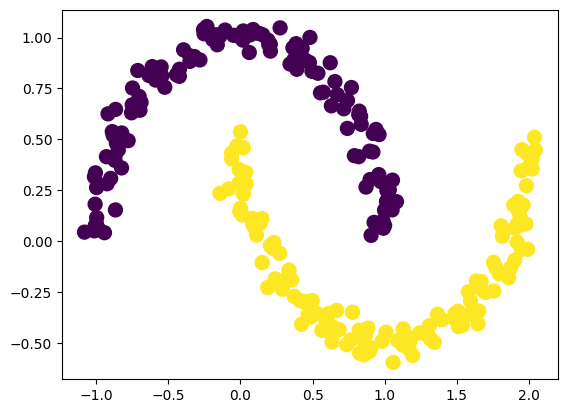

In [11]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

## Less dense NN doesnot face Vanishing gradient Problem

In [13]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.get_weights()[0]

array([[ 0.24283665, -0.2243866 , -0.12551266, -0.5366022 ,  0.53847843,
         0.43702322, -0.35118708, -0.14360929, -0.40590551, -0.11523187],
       [ 0.43943638, -0.04074705,  0.43760258, -0.1497348 ,  0.6140838 ,
        -0.35412556,  0.5619392 , -0.5458529 ,  0.205096  ,  0.19716734]],
      dtype=float32)

In [20]:
old_weights = model.get_weights()[0]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 4ms/step - loss: 0.8645 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8432 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8232 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8048 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7884 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7739 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7607 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7497 - accuracy: 0.4900
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.4900
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7312 - accuracy: 0.4900
Epoch 11/100
7/7 [===========

In [23]:
model.get_weights()[0]

array([[-0.57531077, -1.002814  , -0.94086677, -1.2807463 , -0.3304525 ,
         1.2369678 , -1.1513778 ,  0.79948825, -1.2040566 , -0.9841506 ],
       [ 1.3197064 ,  0.8927236 ,  1.3827186 ,  0.7493747 ,  1.5171475 ,
        -1.3675437 ,  1.6454084 , -1.6133343 ,  1.2322217 ,  1.2425666 ]],
      dtype=float32)

In [25]:
new_weights = model.get_weights()[0]

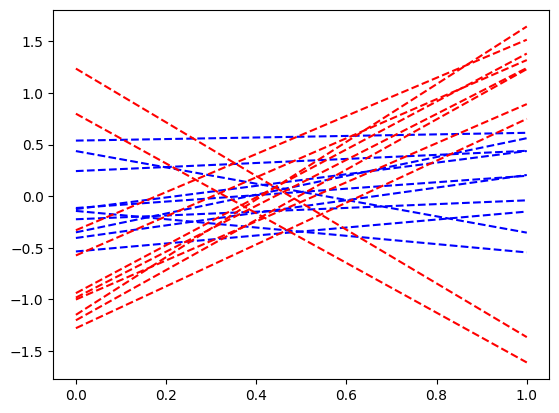

In [26]:
plt.plot(old_weights, linestyle='--', color='blue')
plt.plot(new_weights, linestyle='--', color='red')

In [27]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [28]:
gradient

array([[  818.1474 ,   778.4274 ,   815.35406,   744.1441 ,   868.9309 ,
         -799.9445 ,   800.1907 ,  -943.0975 ,   798.1511 ,   868.9187 ],
       [ -880.27   ,  -933.47064,  -945.11597,  -899.10944,  -903.06366,
         1013.41815, -1083.4691 ,  1067.4813 , -1027.1256 , -1045.3992 ]],
      dtype=float32)

In [29]:
percent_change

array([[ 336.91266,  346.91354,  649.619  ,  138.67706,  161.36783,
         183.04396,  227.8531 ,  656.7107 ,  196.63472,  754.0611 ],
       [ 200.31798, 2290.8916 ,  215.97586,  600.46796,  147.0587 ,
         286.17484,  192.80898,  195.5621 ,  500.8024 ,  530.2091 ]],
      dtype=float32)

## Now lets increase the density

In [40]:
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
old_weight = model.get_weights()[0]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 9s 8ms/step - loss: 0.8697 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.8484 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.8290 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.8117 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7955 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7795 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7652 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7541 - accuracy: 0.4900
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7432 - accuracy: 0.4900
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7339 - accuracy: 0.4900
Epoch 11/100
7/7 [==========

### Now we are facing Vanishing Gradient Problem since loss came to a constant value of 0.69 after few epochs.
- to solve this we can use relu function instead  of  sigmoid

In [46]:
new_weight = model.get_weights()[0]

gradient = (old_weight - new_weight)/ 0.001
percent_change = abs(100*(old_weight - new_weight)/ old_weight)

In [47]:
percent_change

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
## So no change in weights(Modle stopped training)
## So now lets try with relu function

In [49]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
old_weights = model.get_weights()[0]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 4s 7ms/step - loss: 0.6934 - accuracy: 0.4600
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.7250
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6852 - accuracy: 0.8150
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6784 - accuracy: 0.8500
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6696 - accuracy: 0.8650
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6570 - accuracy: 0.8800
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6416 - accuracy: 0.9100
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6225 - accuracy: 0.9100
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5979 - accuracy: 0.9200
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5706 - accuracy: 0.9150
Epoch 11/100
7/7 [===========

In [54]:
new_weights = model.get_weights()[0]

In [55]:
model.optimizer.get_config()["learning_rate"]

0.001

In [56]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [57]:
gradient

array([[ 159.20346  ,   47.02693  , -113.870285 ,   -1.4338492,
         -50.53508  ,  110.440605 ,  171.19264  ,  -17.87561  ,
          -5.2667556,   96.82229  ],
       [-142.07803  ,   15.3292265,   91.98045  ,    0.9168386,
          70.89138  ,  -53.276657 , -139.51183  ,  -21.781563 ,
          31.351685 ,  -79.32773  ]], dtype=float32)

In [58]:
percent_change

array([[24.488626  , 33.563904  , 22.287918  ,  0.52850026, 13.017129  ,
        16.601469  , 34.69355   ,  3.5636823 ,  1.0705957 , 22.123028  ],
       [35.254368  ,  6.2152543 , 17.71009   ,  0.17616844, 12.878037  ,
         8.649093  , 51.89386   ,  4.36946   ,  7.0242214 , 14.410873  ]],
      dtype=float32)

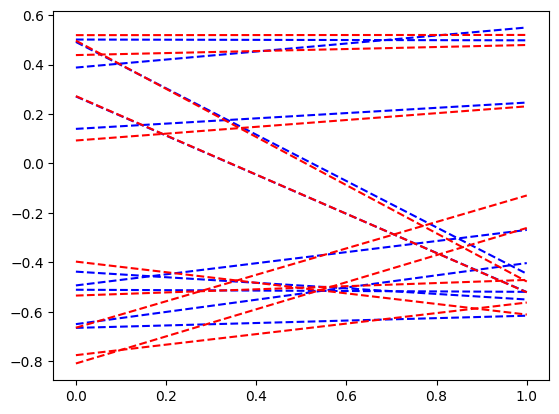

In [59]:
plt.plot(old_weights, linestyle='--', color='blue')
plt.plot(new_weights, linestyle='--', color='red')